In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import folium

from classifier import Classifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [128]:
cord = pd.read_csv('LIS_CELLCOUNTS_2019_withStationLocations.xlsx - 2019.csv')
cord = cord.fillna(0)
cords = cord[['ST', 'lat', 'lon']].drop_duplicates()
cords['ST'] = cords['ST'].str.replace(" ", "", regex=False)
lats = cords['lat'].tolist()
lons = cords['lon'].tolist()
x, y = (lons, lats)

cords

,ST,lat,lon
0,A4S,40.956167,-73.580167
1,B3S,40.950000,-73.620000
2,C1S,40.956167,-73.580167
3,D3S,40.994167,-73.410833
4,E1S,41.019167,-73.292167
5,F2S,41.080167,-73.165333
6,H4S,41.102500,-72.933667
7,I2S,41.137500,-72.656500
8,J2S,41.181667,-72.458667
9,K2S,41.234167,-72.267000


In [132]:
# Create a Folium map centered around Long Island Sound
map = folium.Map(location=[41.0, -73.0], zoom_start=9)

# Add markers with corresponding letters in popups
for index in cords.index:
    lat = cords.at[index, 'lat']
    lon = cords.at[index, 'lon']
    folium.Marker(location=[lat, lon], popup=cords.at[index, 'ST'], icon=folium.Icon(color='blue')).add_to(map)

map

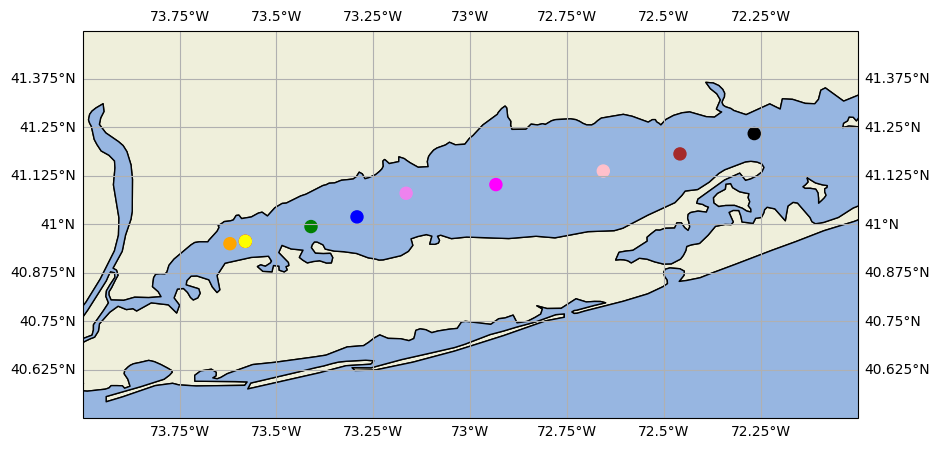

In [130]:
# Define the geographic bounds for Long Island Sound
# lon_min, lon_max = -74.5, -71.5
# lat_min, lat_max = 40.5, 42.0


#map = Basemap(projection='cyl', lon_0=-73, lat_0=41, llcrnrlat=40.7, urcrnrlat=41.3, llcrnrlon=-74, urcrnrlon=-72, resolution='f')

# Create a figure and axis with PlateCarree projection
map = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Unpack the tuple
fig, ax = map

x, y = (lons, lats)

# Set the extent to zoom in on Long Island Sound
map = ax.set_extent([-74, -72, 40.5, 41.5], crs=ccrs.PlateCarree())

# Add features with high resolution
map = ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
map = ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
map = ax.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black')
map = ax.add_feature(cfeature.OCEAN.with_scale('10m'))

# Add gridlines with labels
map = ax.gridlines(draw_labels=True)

map.xlocator = plt.FixedLocator(np.arange(-74, -72, .25))
map.ylocator = plt.FixedLocator(np.arange(40.5, 41.5, .125))  

map = plt.scatter(x, y, s=75, color=['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'magenta', 'pink', 'brown', 'black'])

# Show the plot
plt.show()


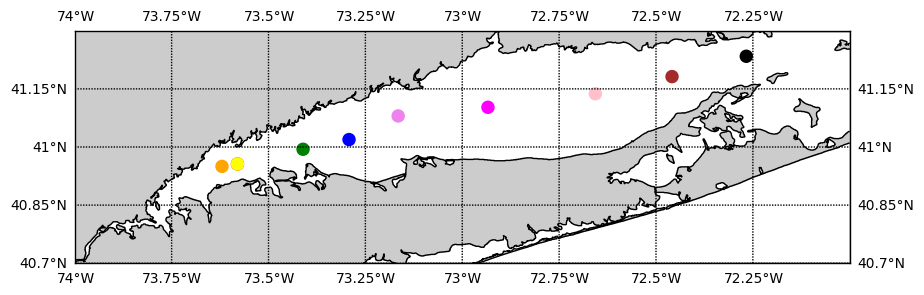

In [131]:
#https://matplotlib.org/basemap/stable/users/examples.html

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap instance
map = Basemap(projection='cyl', lon_0=-73, lat_0=41, llcrnrlat=40.7, urcrnrlat=41.3, llcrnrlon=-74, urcrnrlon=-72, resolution='f', ax=ax)

# Scatter plot on the Basemap
map.scatter(x, y, s=75, color=['red', 'orange', 'yellow', 'green', 'blue', 'violet', 'magenta', 'pink', 'brown', 'black'], ax=ax)

# Add map features
map.drawmapboundary()
map.fillcontinents()
map.drawcoastlines()
map.drawparallels(np.arange(40.7, 41.3, .15), labels=[1, 1, 1, 1])
map.drawmeridians(np.arange(-74, -72, .25), labels=[1, 1, 1, 1])

plt.show()

In [ ]:
csv_name = "LIS_2019-Phytoplankton_Final Report Data.xlsx - 2019 LIS phytoplankton count.csv"

In [13]:
classified = Classifier(csv_name)

In [125]:
# map = Basemap(llcrnrlon=3.75,llcrnrlat=39.75,urcrnrlon=4.35,urcrnrlat=40.15, epsg=5520)
# #http://server.arcgisonline.com/arcgis/rest/services

# map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
# plt.show()
